<a href="https://colab.research.google.com/github/zhesun0304/ECON3916/blob/main/Lab5/Probability%20%E2%80%94%20The%20Engine%20of%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Probability — The Engine of Prediction

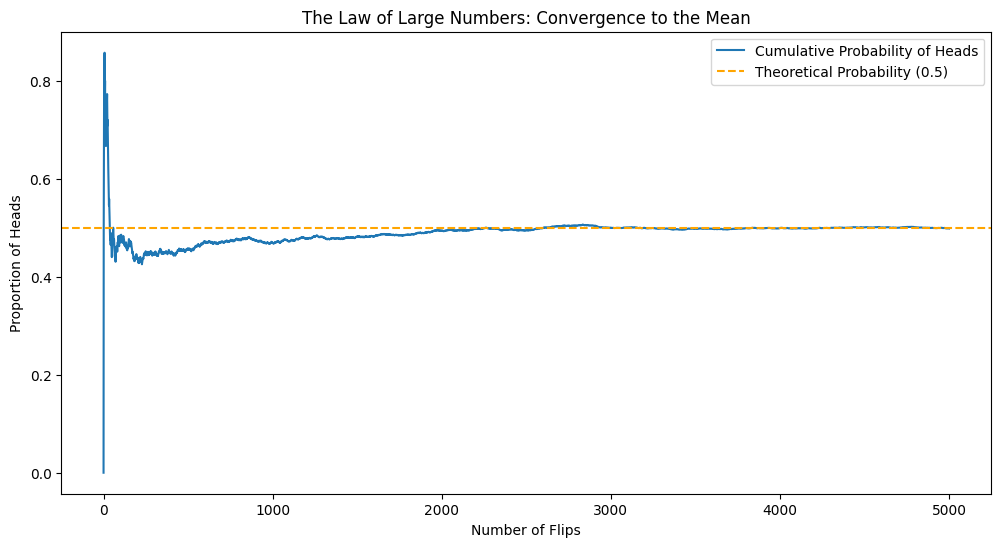

In [11]:
# Module A: The Law of Large Numbers
import numpy as np
import matplotlib.pyplot as plt

def simulate_law_of_large_numbers(n_flips):
    # Simulate n_flips of a fair coin that are zero or one
    flips = np.random.randint(0, 2, size=n_flips)

    # Calculate cumulative average
    # cumsum adds them up sequentially
    # Divide by range(1, n+1) to get average at each step
    cumulative_averages = np.cumsum(flips) / np.arange(1, n_flips + 1)

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_averages, label='Cumulative Probability of Heads')
    plt.axhline(0.5, color='orange', linestyle='--', label='Theoretical Probability (0.5)')
    plt.title('The Law of Large Numbers: Convergence to the Mean')
    plt.xlabel('Number of Flips')
    plt.ylabel('Proportion of Heads')
    plt.legend()
    plt.show()

# Run the simulation
simulate_law_of_large_numbers(5000)

In [12]:
# Module B: The Monty Hall Simulation
def monty_hall_sim(n_games):
    switch_wins = 0
    stay_wins = 0

    for _ in range(n_games):
        doors = [0, 1, 2]
        prize = np.random.choice(doors)
        choice = np.random.choice(doors)

        # Host opens a door and cannot open 'prize' and cannot open 'choice'
        openable_doors = [d for d in doors if d != prize and d != choice]
        host_opens = np.random.choice(openable_doors)

        # Strategy: Stay
        if choice == prize:
            stay_wins += 1

        # Strategy: Switch
        # The switch choice is the door that is not 'choice' and not 'host_opens'
        switch_choice = [d for d in doors if d != choice and d != host_opens]
        if switch_choice[0] == prize:
            switch_wins += 1

    print(f"Win Rate (Stay): {stay_wins/n_games:.2%}")
    print(f"Win Rate (Switch): {switch_wins/n_games:.2%}")

monty_hall_sim(10000)

Win Rate (Stay): 33.26%
Win Rate (Switch): 66.74%


Probability of Revenue Decline: 17.49%
95% Value at Risk (Worst Case): $9,612,893.02


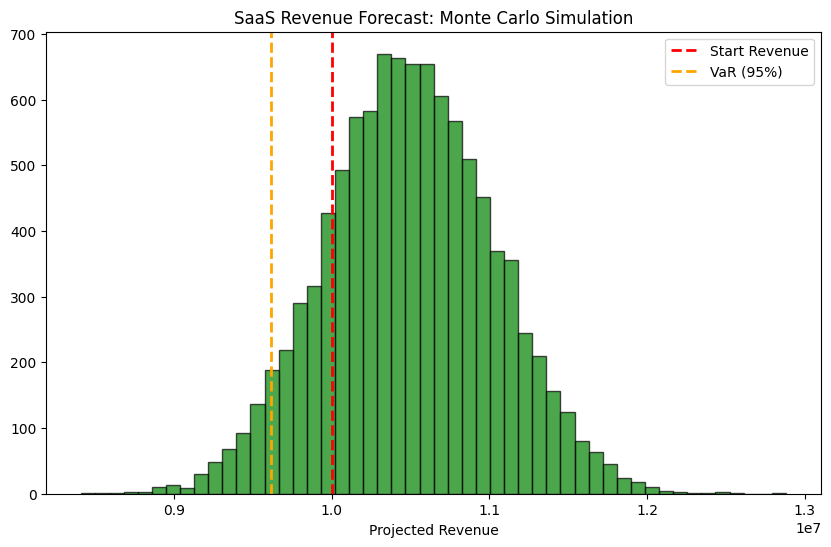

In [13]:
# Module C: SaaS Business Risk (VaR)
def saas_risk_model(n_sims):
    base_rev = 10_000_000

    # Stochastic Inputs
    # Churn is centered at 10% but can vary, where standard deviation equals to 2%
    churn_sims = np.random.normal(0.10, 0.02, n_sims)
    # Sales centered at $1.5M, varies by $500k
    sales_sims = np.random.normal(1_500_000, 500_000, n_sims)

    # The Transfer Function (The Business Logic)
    net_revenue = base_rev * (1 - churn_sims) + sales_sims

    # Risk Metrics
    # Probability that we end the year with LESS money than we started
    prob_loss = np.mean(net_revenue < base_rev)

    # Value at Risk (95% Confidence)
    # We are 95% sure revenue will be ABOVE this number (the 5th percentile)
    var_95 = np.percentile(net_revenue, 5)

    print(f"Probability of Revenue Decline: {prob_loss:.2%}")
    print(f"95% Value at Risk (Worst Case): ${var_95:,.2f}")

    # Visualization
    plt.figure(figsize=(10,6))
    plt.hist(net_revenue, bins=50, alpha=0.7, color='green', edgecolor='black')
    plt.axvline(base_rev, color='red', linestyle='dashed', linewidth=2, label='Start Revenue')
    plt.axvline(var_95, color='orange', linestyle='dashed', linewidth=2, label='VaR (95%)')
    plt.title('SaaS Revenue Forecast: Monte Carlo Simulation')
    plt.xlabel('Projected Revenue')
    plt.legend()
    plt.show()

saas_risk_model(10000)

Probability of Revenue Decline: 11.15%
95% Value at Risk (Worst Case): $9,770,814.27


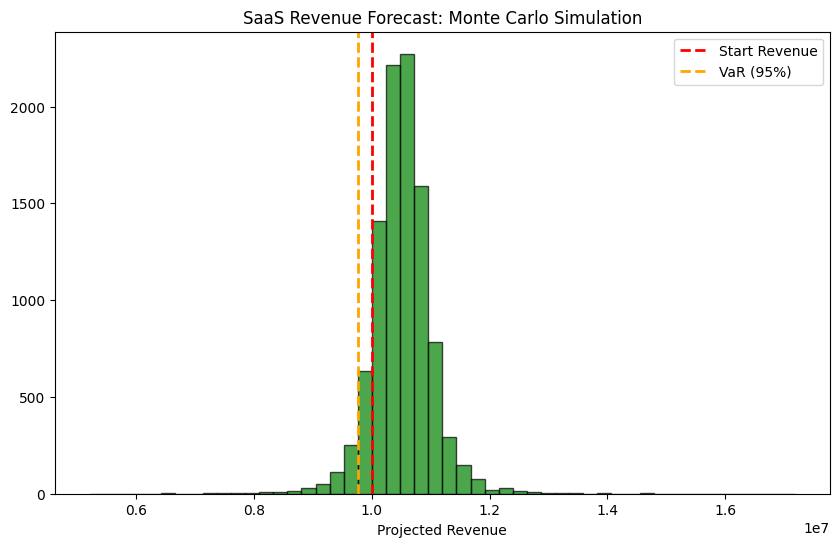

In [14]:
# Phase 4: Assessment - The "Fat Tail" Stress Test
def saas_risk_model(n_sims):
    base_rev = 10_000_000

    # Stochastic Inputs
    # Churn is centered at 10% but can vary, where standard deviation equals to 2%
    churn_sims = np.random.normal(0.10, 0.02, n_sims)
    # Sales centered at $1.5M, varies by $500k
    sales_sims = np.random.normal(1_500_000, 500_000, n_sims)

    sales_std = 500000
    sales_mean = 1500000
    df = 3

    t = np.random.standard_t(df=df, size=n_sims)
    # Adjust scale so the final sales has about the same std as 500k
    # Var(t) = df/(df-2) for df>2, so std factor = sqrt(df/(df-2))

    t_std_factor = np.sqrt(df / (df - 2))
    sales_sims = sales_mean + (sales_std / t_std_factor) * t

    # The Transfer Function (The Business Logic)
    net_revenue = base_rev * (1 - churn_sims) + sales_sims

    # Risk Metrics
    # Probability that we end the year with LESS money than we started
    prob_loss = np.mean(net_revenue < base_rev)

    # Value at Risk (95% Confidence)
    # We are 95% sure revenue will be ABOVE this number (the 5th percentile)
    var_95 = np.percentile(net_revenue, 5)

    print(f"Probability of Revenue Decline: {prob_loss:.2%}")
    print(f"95% Value at Risk (Worst Case): ${var_95:,.2f}")

    # Visualization
    plt.figure(figsize=(10,6))
    plt.hist(net_revenue, bins=50, alpha=0.7, color='green', edgecolor='black')
    plt.axvline(base_rev, color='red', linestyle='dashed', linewidth=2, label='Start Revenue')
    plt.axvline(var_95, color='orange', linestyle='dashed', linewidth=2, label='VaR (95%)')
    plt.title('SaaS Revenue Forecast: Monte Carlo Simulation')
    plt.xlabel('Projected Revenue')
    plt.legend()
    plt.show()

saas_risk_model(10000)

## Fat-Tail Stress Test Results and Capital Reserve Implications

This analysis evaluates revenue risk using two Monte Carlo specifications: a baseline model assuming normally distributed new sales and a stress-test model in which new sales follow a Student's t-distribution to capture fat-tail risk. Both models are calibrated to the same average sales level and volatility, allowing for a direct comparison of downside risk.

Under the normal model, the probability of ending the year with lower revenue than the starting level is 17.37%, and the 5th-percentile Value at Risk (VaR) is approximately 9.61 million. This reflects a relatively symmetric distribution in which extreme negative outcomes are infrequent. In contrast, the fat-tail model produces a more concentrated center but significantly heavier tails. While the probability of revenue decline decreases to 11.87%, the lower tail remains materially exposed, with a 5th-percentile VaR of approximately $9.75 million.

The key distinction is not average performance but tail behavior. The fat-tail model assigns greater probability mass to extreme adverse outcomes, reflecting real-world conditions where rare shocks—such as demand collapses, failed enterprise deals, or market disruptions—occur more often than predicted by a normal distribution. As a result, downside risk persists even when central outcomes appear stable. Relying solely on the normal model would understate these risks, whereas the fat-tail framework supports maintaining higher capital reserves to ensure solvency under extreme but plausible stress scenarios.
